In [1]:
import requests
import json

lat = "42.098701"
lon = "-75.912537"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [2]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-20T22:51:35+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T23:33:00+00:00',
  'updateTime': '2023-03-20T22:51:35+00:00',
  'validTimes': '2023-03-20T16:00:00+00:00/P7DT21H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T19:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'i

# Exercise 1

In [3]:
import csv

csv_file = open("Weather.csv", "w", newline="", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

a = json["properties"]["periods"]
a

for i in a: 
    day = i["name"]
    temp = i["temperature"]
    desc = i["detailedForecast"]

    csv_writer.writerow([day, temp, desc])

csv_file.close()

In [4]:
import pandas as pd
pd.read_csv("Weather.csv")

,Day,Temperature,Description
0,Tonight,30,A slight chance of snow showers after 5am. Mos...
1,Tuesday,55,A slight chance of snow showers before 7am. Mo...
2,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
3,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
7,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
8,Friday Night,34,"A chance of rain before 1am, then a chance of ..."
9,Saturday,44,"Rain and snow likely. Mostly cloudy, with a hi..."


# Exercise 2

<function matplotlib.pyplot.show(close=None, block=None)>

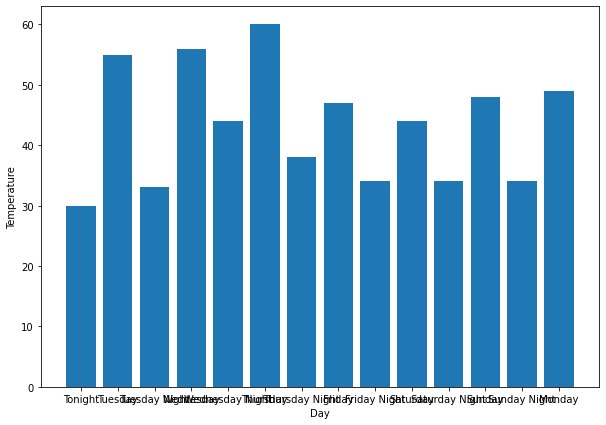

In [5]:
from matplotlib import pyplot as plt
import numpy as np
df = pd.DataFrame(pd.read_csv("weather"))

day = df["Day"]
temp = df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(day[0:14], temp[0:14])
plt.ylabel("Temperature")
plt.xlabel("Day")

plt.show

# Exercise 3

In [6]:
def get_public_holidays(country_code):
    url = f"https://date.nager.at/api/v3/publicholidays/2023/{country_code}"
    response = requests.get(url)
    
    if response.status_code == 200: #This block of code here checks HTTP response status. If I get anything other than 200 that mwans that my code works well and that I get the requested data but if HTTP does not equal 200 then that means that there is no data on that country so it instead returns an empty list, I did this to overcome the error I ran into for countries that had no holiday data.
        return response.json()
    else:
        return []

def main():
    country_codes = ["US", "UA", "MKD", "FR", "GB", "AU", "BR", "ALB", "JP", "RO"]
    total_holidays = 0
    
    for i in country_codes:
        holidays = get_public_holidays(i)
        if holidays:
            num_holidays = len(holidays)
            print(f"{i}: {num_holidays} public holidays.")
            total_holidays += num_holidays
        else:
            print(f"{i}: No public holiday information available.")
    
    print(f"Total number of public holidays: {total_holidays}")

main()

US: 13 public holidays.
UA: 11 public holidays.
MKD: No public holiday information available.
FR: 11 public holidays.
GB: 16 public holidays.
AU: 21 public holidays.
BR: 14 public holidays.
ALB: No public holiday information available.
JP: 16 public holidays.
RO: 15 public holidays.
Total number of public holidays: 117


# Bonus 1

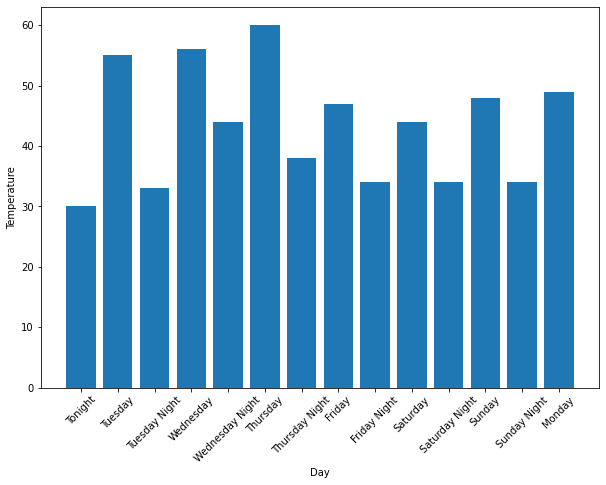

In [7]:
df = pd.read_csv("weather")

day = df["Day"]
temp = df["Temperature"]

fig = plt.figure(figsize=(10, 7))
plt.bar(day[0:14], temp[0:14])
plt.ylabel("Temperature")
plt.xlabel("Day")

plt.xticks(rotation=45) #All I had to do so that they were not cluttered was to rotate the x-axis labels.

plt.show()

# Bonus 2

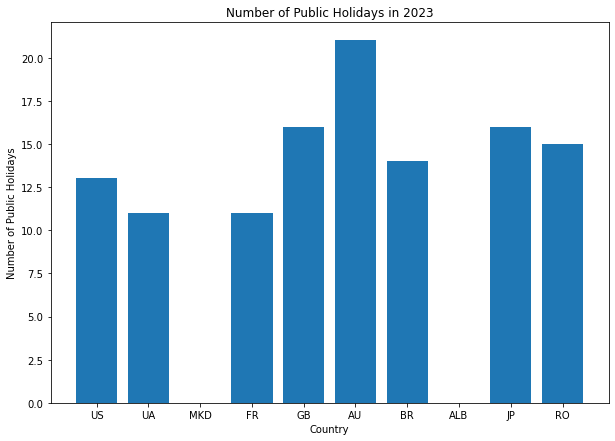

In [8]:
#To get this to work I had to store the public holiday data values into a dictionary.
def get_public_holidays(country_code):
    url = f"https://date.nager.at/api/v3/publicholidays/2023/{country_code}" 
    response = requests.get(url)
    
    if response.status_code == 200: #This block of code here checks HTTP response status. If I get anything other than 200 that mwans that my code works well and that I get the requested data but if HTTP does not equal 200 then that means that there is no data on that country so it instead returns an empty list, I did this to overcome the error I ran into for countries that had no holiday data.
        return response.json()
    else:
        return []

def main():
    country_codes = ["US", "UA", "MKD", "FR", "GB", "AU", "BR", "ALB", "JP", "RO"]
    holidays_count = {}
    
    for i in country_codes:
        holidays = get_public_holidays(i)
        if holidays:
            num_holidays = len(holidays)
            holidays_count[i] = num_holidays
        else:
            holidays_count[i] = 0
    
    return holidays_count

holidays_count = main()

df = pd.DataFrame(list(holidays_count.items()), columns=["Country", "Number of Holidays"])

fig = plt.figure(figsize=(10, 7))
plt.bar(df["Country"], df["Number of Holidays"])
plt.xlabel("Country")
plt.ylabel("Number of Public Holidays")
plt.title("Number of Public Holidays in 2023")
plt.show()